In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("/content/FinancialData.csv",names=['label','reviews'],encoding='ISO-8859-1')

In [4]:
data

,label,reviews
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [5]:
data.head()

,label,reviews
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [6]:
data.tail()

,label,reviews
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...
4845,negative,Sales in Finland decreased by 10.5 % in Januar...


In [7]:
data.shape

(4846, 2)

In [8]:
data.dtypes

label      object
reviews    object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    4846 non-null   object
 1   reviews  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [10]:
data.isnull().sum()

label      0
reviews    0
dtype: int64

In [11]:
data.describe()

,label,reviews
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


In [12]:
data['label'].value_counts()

neutral     2879
positive    1363
negative     604
Name: label, dtype: int64

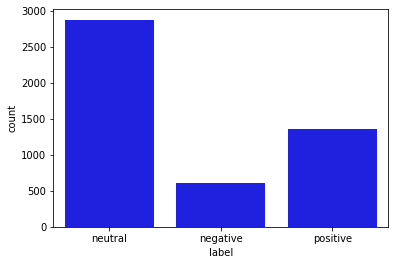

In [13]:
sns.countplot(data['label'],color='blue')

In [14]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

([<matplotlib.patches.Wedge at 0x7f0df903c750>,
 [Text(-0.34959760069113766, 1.1479466527635334, 'neutral'),
  Text(-0.1149590625095695, -1.1944808135532865, 'positive'),
  Text(1.0167443812888217, -0.4197985982797124, 'negative')],
 [Text(-0.20393193373649693, 0.6696355474453943, '59.4%'),
  Text(-0.0670594531305822, -0.6967804745727504, '28.1%'),
  Text(0.5545878443393573, -0.2289810536071158, '12.5%')])

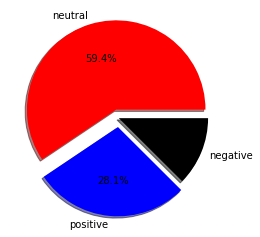

In [17]:
labels=["neutral","positive","negative"]
plt.figure(figsize=(4,8))
plt.pie(data.label.value_counts(),labels=labels,colors=["red","blue","black"],
       autopct="%2.1f%%",shadow=True,explode=[0.1,0.1,0])

In [18]:
features=data.iloc[:,:-1].values
labels=data.iloc[:,0].values

In [40]:
pro_features=[]
for i in range(0, len(features)):
    pro_feature = re.sub(r'\W', ' ', str(features[i]))
    pro_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', pro_feature)
    pro_feature= re.sub(r'\s+[a-zA-Z_0-9]\s+', ' ', pro_feature)
    pro_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', pro_feature) 
    pro_feature = re.sub(r'\s+', ' ', pro_feature, flags=re.I)
    pro_feature = re.sub(r'^b\s+', '', pro_feature)
    pro_feature = pro_feature.lower()
    pro_features.append(pro_feature)

In [41]:
pro_features[:14]

[' neutral ',
 ' neutral ',
 ' negative ',
 ' positive ',
 ' positive ',
 ' positive ',
 ' positive ',
 ' positive ',
 ' positive ',
 ' positive ',
 ' positive ',
 ' positive ',
 ' positive ',
 ' positive ']

In [42]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))
pro_features=vectorizer.fit_transform(pro_features).toarray()

In [43]:
max(pro_features[3].tolist())

1.0

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(pro_features,labels,random_state=10)

In [45]:
x_train.shape,y_train.shape

((3634, 3), (3634,))

In [46]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
pred=rf.predict(x_test)

In [49]:
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       161
     neutral       1.00      1.00      1.00       723
    positive       1.00      1.00      1.00       328

    accuracy                           1.00      1212
   macro avg       1.00      1.00      1.00      1212
weighted avg       1.00      1.00      1.00      1212

[[161   0   0]
 [  0 723   0]
 [  0   0 328]]


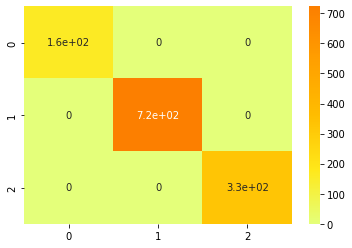

In [50]:
sns.heatmap(confusion_matrix(y_test,pred),cmap="Wistia",annot=True)